Hierarchical Clustering

Objective: To group customers based on their spendings on different type of products in a wholesale store 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading dataset
custdata = pd.read_csv(r"C:\Users\Ishwari Kadam\Desktop\SEM 3\MLBA\Wholesale customers data.csv")
custdata.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,101,2,3,12669,9656,7561,214,2674,1338
1,102,2,3,7057,9810,9568,1762,3293,1776
2,103,2,3,6353,8808,7684,2405,3516,7844
3,104,1,3,13265,1196,4221,6404,507,1788
4,105,2,3,22615,5410,7198,3915,1777,5185


In [3]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [7]:
#creating subset without customer id 
data = custdata.iloc[:, 1:9].values
data

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

Plot Dendogram to determine number of clusters to be made

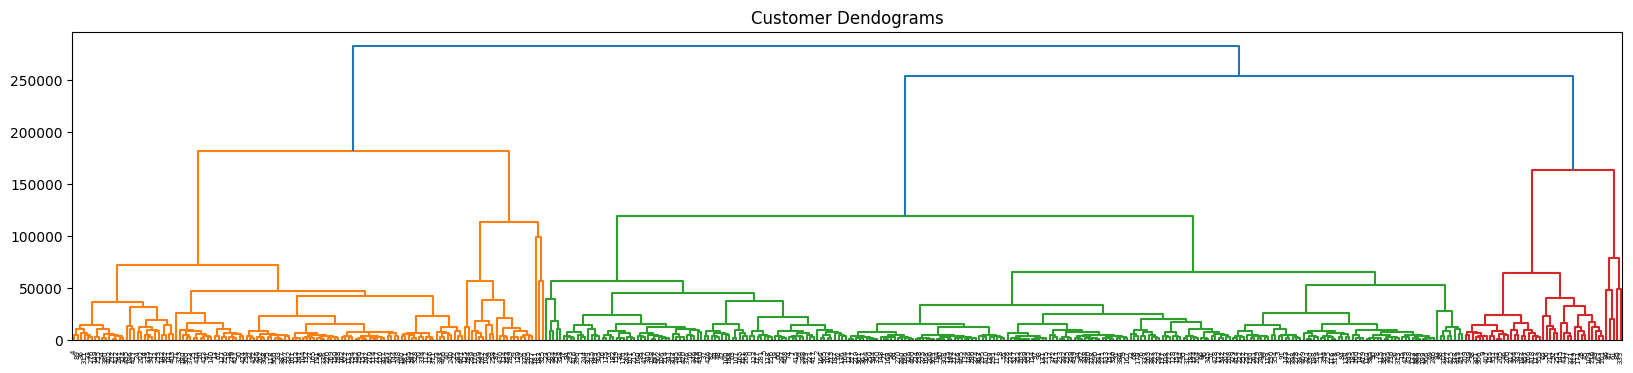

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 4))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean')) #ward = minimum of variance

From the dendogram, we get to know that ideal numbers of clusters which can be formed is 3

In [10]:
#perform clustering using Agglomerative method
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward') # ward = minimum variance

In [11]:
custdata['Cluster'] = cluster.fit_predict(data)
custdata

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,101,2,3,12669,9656,7561,214,2674,1338,2
1,102,2,3,7057,9810,9568,1762,3293,1776,2
2,103,2,3,6353,8808,7684,2405,3516,7844,2
3,104,1,3,13265,1196,4221,6404,507,1788,2
4,105,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...,...
435,536,1,3,29703,12051,16027,13135,182,2204,0
436,537,1,3,39228,1431,764,4510,93,2346,0
437,538,2,3,14531,15488,30243,437,14841,1867,1
438,539,1,3,10290,1981,2232,1038,168,2125,2


plt.figure(figsize=(12, 4))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [12]:
#naming the groups
custdata.Cluster = custdata.Cluster.replace([0,1,2],['First Group','Second Group','Third Group'])
custdata.head()

,CustomerID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,101,2,3,12669,9656,7561,214,2674,1338,Third Group
1,102,2,3,7057,9810,9568,1762,3293,1776,Third Group
2,103,2,3,6353,8808,7684,2405,3516,7844,Third Group
3,104,1,3,13265,1196,4221,6404,507,1788,Third Group
4,105,2,3,22615,5410,7198,3915,1777,5185,First Group


In [13]:
custdata.Cluster.value_counts()

Cluster
Third Group     261
First Group     134
Second Group     45
Name: count, dtype: int64

Third group includes majority of the customers